In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from matplotlib.lines import Line2D

In [2]:
logs_path = os.path.join(os.path.dirname(os.getcwd()), "hyperparameter_logs.csv")
df = pd.read_csv(logs_path)
experiment_header = ['dataset name', 'model', 'X_min_normalizer', 'X_max_normalizer',
       'Y_normalizer', 'criterion_function', 'optimizer_function',
       'bias_init_function', 'weights_init_function', 'learning_rate',
       'total_epochs', 'batch_size', 'total_folds']
# df

In [3]:
experimenten = df[experiment_header].drop_duplicates()
experimenten

,dataset name,model,X_min_normalizer,X_max_normalizer,Y_normalizer,criterion_function,optimizer_function,bias_init_function,weights_init_function,learning_rate,total_epochs,batch_size,total_folds
0,short_highway,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x0000026BB20BD9E0>,<function xavier_uniform_ at 0x0000026BB20BDC60>,0.0100,100,1000,5
500,short_highway,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001B4C5E09940>,<function xavier_uniform_ at 0x000001B4C5E09BC0>,0.0100,1000,1000,5
5500,short_highway,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001B4C5E09940>,<function xavier_uniform_ at 0x000001B4C5E09BC0>,0.0100,1000,1000,5
10500,short_highway,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001B4C5E09940>,<function xavier_uniform_ at 0x000001B4C5E09BC0>,0.0100,1000,1000,5
15500,short_highway,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001B4C5E09940>,<function xavier_uniform_ at 0x000001B4C5E09BC0>,0.0100,1000,1000,5
20500,short_highway,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001B4C5E09940>,<function xavier_uniform_ at 0x000001B4C5E09BC0>,0.0100,1000,1000,5
25500,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,1.0000,30,1000,5
25650,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,0.5000,30,1000,5
25800,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,0.1000,30,1000,5
25950,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,0.0500,30,1000,5


In [4]:
def plot_losses_per_epoch(experiment, df, color):
    condition = df[experiment_header[0]] == experiment[0]
    for i in range(1, len(experiment)):
        condition = condition & (df.iloc[:, i] == experiment[i])
    filtered_df = df[condition]
    total_epochs = experiment[10]
    
    for fold in range(5):
        fold_df = filtered_df[filtered_df["fold"] == fold]
        epochs = []
        trainerrors = []
        testerrors = []
        for i in range(total_epochs):
            trainerrors.append(fold_df[fold_df["epoch"] == i]["train_loss"].values[0])
            testerrors.append(fold_df[fold_df["epoch"] == i]["test_loss"].values[0])
            epochs.append(i+1)
        plt.plot(epochs, trainerrors, color=color, label=color)
        plt.plot(epochs, testerrors, color=color, linestyle="dashed", label=color)


def plot_multiple_experiments(experiments, df, labels):
    colors = [
        "tab:blue", 
        "tab:orange", 
        "tab:green",
        "tab:red",
        "tab:purple",
        "tab:brown",
        "tab:pink",
        "tab:gray",
        "tab:olive",
        "tab:cyan",
    ]
    legend_handles = []

    for i in range(len(experiments.values)):
        experiment = experiments.values[i]
        color = colors[i % len(colors)]
        plot_losses_per_epoch(experiment, df, color)

        # Set legend handle
        patch = mpatches.Patch(color=color, label=labels[i])
        line1 = Line2D([0], [0], color=color, linewidth=3, label=str(labels[i]) + " (train)")
        line2 = Line2D([0], [0], color=color, linewidth=3, linestyle='--', label=str(labels[i]) + " (test)")
        legend_handles.append(line1)
        legend_handles.append(line2)
        
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend(handles=legend_handles)

        



In [5]:
def plot_losses_per_epoch_averaged(experiment, df, color):
    condition = df[experiment_header[0]] == experiment[0]
    for i in range(1, len(experiment)):
        condition = condition & (df.iloc[:, i] == experiment[i])
    filtered_df = df[condition]
    total_epochs = experiment[10]
    
    epochs = []
    trainerrors = []
    testerrors = []
    for i in range(total_epochs):
        trainerrors.append(filtered_df[filtered_df["epoch"] == i]["train_loss"].mean())
        testerrors.append(filtered_df[filtered_df["epoch"] == i]["test_loss"].mean())
        epochs.append(i+1)
    plt.plot(epochs, trainerrors, color=color, label=color)
    plt.plot(epochs, testerrors, color=color, linestyle="dashed", label=color)


def plot_multiple_experiments_averaged(experiments, df, labels):
    colors = [
        "tab:blue", 
        "tab:orange", 
        "tab:green",
        "tab:red",
        "tab:purple",
        "tab:brown",
        "tab:pink",
        "tab:gray",
        "tab:olive",
        "tab:cyan",
    ]
    legend_handles = []

    for i in range(len(experiments.values)):
        experiment = experiments.values[i]
        color = colors[i % len(colors)]
        plot_losses_per_epoch_averaged(experiment, df, color)

        # Set legend handle
        patch = mpatches.Patch(color=color, label=labels[i])
        legend_handles.append(patch)
        
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend(handles=legend_handles)

# Different learning rates

In [26]:
different_model_layouts = experimenten.iloc[6:15] 
different_model_layouts

,dataset name,model,X_min_normalizer,X_max_normalizer,Y_normalizer,criterion_function,optimizer_function,bias_init_function,weights_init_function,learning_rate,total_epochs,batch_size,total_folds
25500,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,1.0000,30,1000,5
25650,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,0.5000,30,1000,5
25800,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,0.1000,30,1000,5
25950,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001995222DA80>,<function xavier_uniform_ at 0x000001995222DD00>,0.0500,30,1000,5
26100,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001A521B6DA80>,<function xavier_uniform_ at 0x000001A521B6DD00>,0.0100,30,1000,5
26250,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001A521B6DA80>,<function xavier_uniform_ at 0x000001A521B6DD00>,0.0050,30,1000,5
26400,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001A521B6DA80>,<function xavier_uniform_ at 0x000001A521B6DD00>,0.0010,30,1000,5
26550,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001A521B6DA80>,<function xavier_uniform_ at 0x000001A521B6DD00>,0.0005,30,1000,5
26700,a13_2_months,"Sequential( (0): Linear(in_features=6, out_fe...",0.0,100.0,10000.0,<class 'torch.nn.modules.loss.MSELoss'>,<class 'torch.optim.adam.Adam'>,<function zeros_ at 0x000001A521B6DA80>,<function xavier_uniform_ at 0x000001A521B6DD00>,0.0001,30,1000,5


(0.001, 0.01)

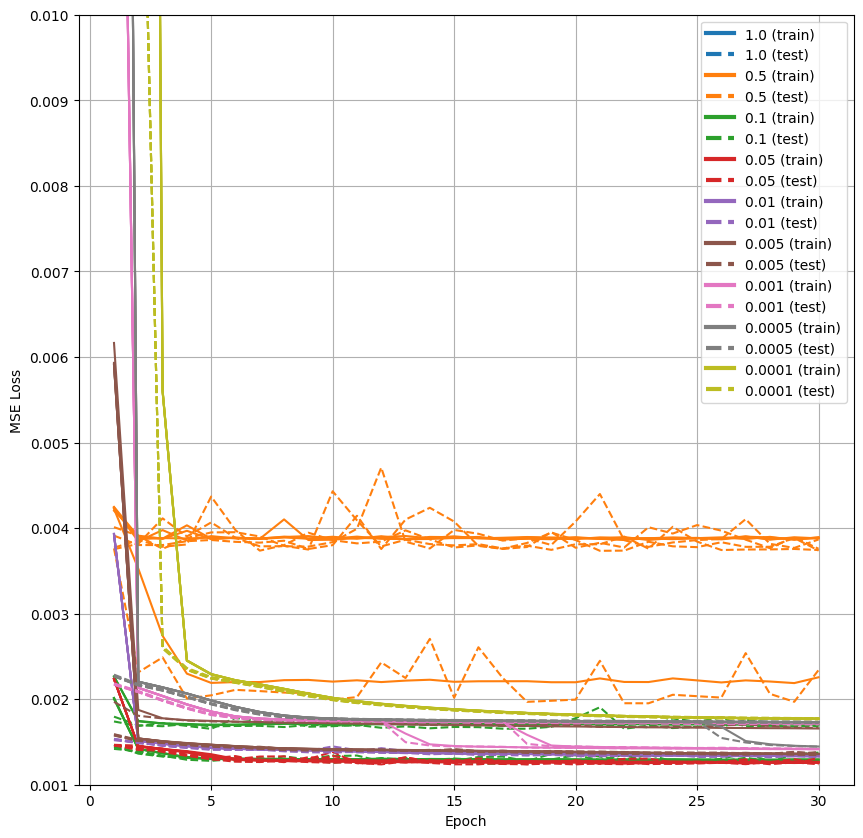

In [29]:
fig = plt.figure(figsize=(10, 10))
plot_multiple_experiments(different_model_layouts, df, different_model_layouts["learning_rate"].to_list())
plt.grid(which="both")
# plt.yscale("log")
plt.ylim(top=0.01, bottom=0.001)

# Amount of model layers

In [31]:
different_model_layouts = experimenten.iloc[20:25] 
different_model_layouts["model"].to_list()

['Sequential(  (0): Linear(in_features=6, out_features=3, bias=True)  (1): Softplus(beta=1, threshold=20))',
 'Sequential(  (0): Linear(in_features=6, out_features=4, bias=True)  (1): Softplus(beta=1, threshold=20)  (2): Linear(in_features=4, out_features=3, bias=True)  (3): Softplus(beta=1, threshold=20))',
 'Sequential(  (0): Linear(in_features=6, out_features=10, bias=True)  (1): Softplus(beta=1, threshold=20)  (2): Linear(in_features=10, out_features=4, bias=True)  (3): Softplus(beta=1, threshold=20)  (4): Linear(in_features=4, out_features=3, bias=True)  (5): Softplus(beta=1, threshold=20))',
 'Sequential(  (0): Linear(in_features=6, out_features=20, bias=True)  (1): Softplus(beta=1, threshold=20)  (2): Linear(in_features=20, out_features=10, bias=True)  (3): Softplus(beta=1, threshold=20)  (4): Linear(in_features=10, out_features=4, bias=True)  (5): Softplus(beta=1, threshold=20)  (6): Linear(in_features=4, out_features=3, bias=True)  (7): Softplus(beta=1, threshold=20))',
 'Sequ

Text(0.5, 1.0, 'Loss progression for different number of hidden layers')

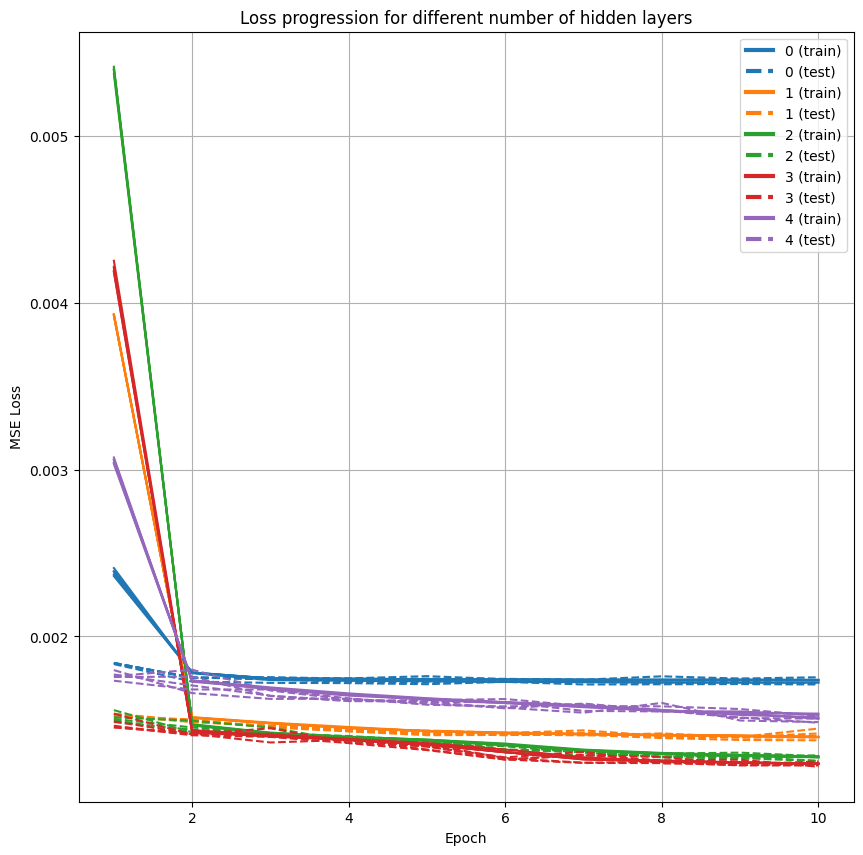

In [32]:
fig = plt.figure(figsize=(10, 10))
plot_multiple_experiments(different_model_layouts, df, [0, 1, 2, 3, 4])
plt.grid(which="both")
# plt.yscale("log")
plt.title("Loss progression for different number of hidden layers")


# Amount of model layers (small dataset)

In [10]:
different_model_layouts = experimenten.iloc[1:6] 
different_model_layouts.model.to_list()

['Sequential(  (0): Linear(in_features=6, out_features=3, bias=True)  (1): Softplus(beta=1, threshold=20))',
 'Sequential(  (0): Linear(in_features=6, out_features=10, bias=True)  (1): Softplus(beta=1, threshold=20)  (2): Linear(in_features=10, out_features=3, bias=True)  (3): Softplus(beta=1, threshold=20))',
 'Sequential(  (0): Linear(in_features=6, out_features=20, bias=True)  (1): Softplus(beta=1, threshold=20)  (2): Linear(in_features=20, out_features=10, bias=True)  (3): Softplus(beta=1, threshold=20)  (4): Linear(in_features=10, out_features=3, bias=True)  (5): Softplus(beta=1, threshold=20))',
 'Sequential(  (0): Linear(in_features=6, out_features=40, bias=True)  (1): Softplus(beta=1, threshold=20)  (2): Linear(in_features=40, out_features=20, bias=True)  (3): Softplus(beta=1, threshold=20)  (4): Linear(in_features=20, out_features=10, bias=True)  (5): Softplus(beta=1, threshold=20)  (6): Linear(in_features=10, out_features=3, bias=True)  (7): Softplus(beta=1, threshold=20))',


Text(0.5, 1.0, 'The average loss for different hidden layers')

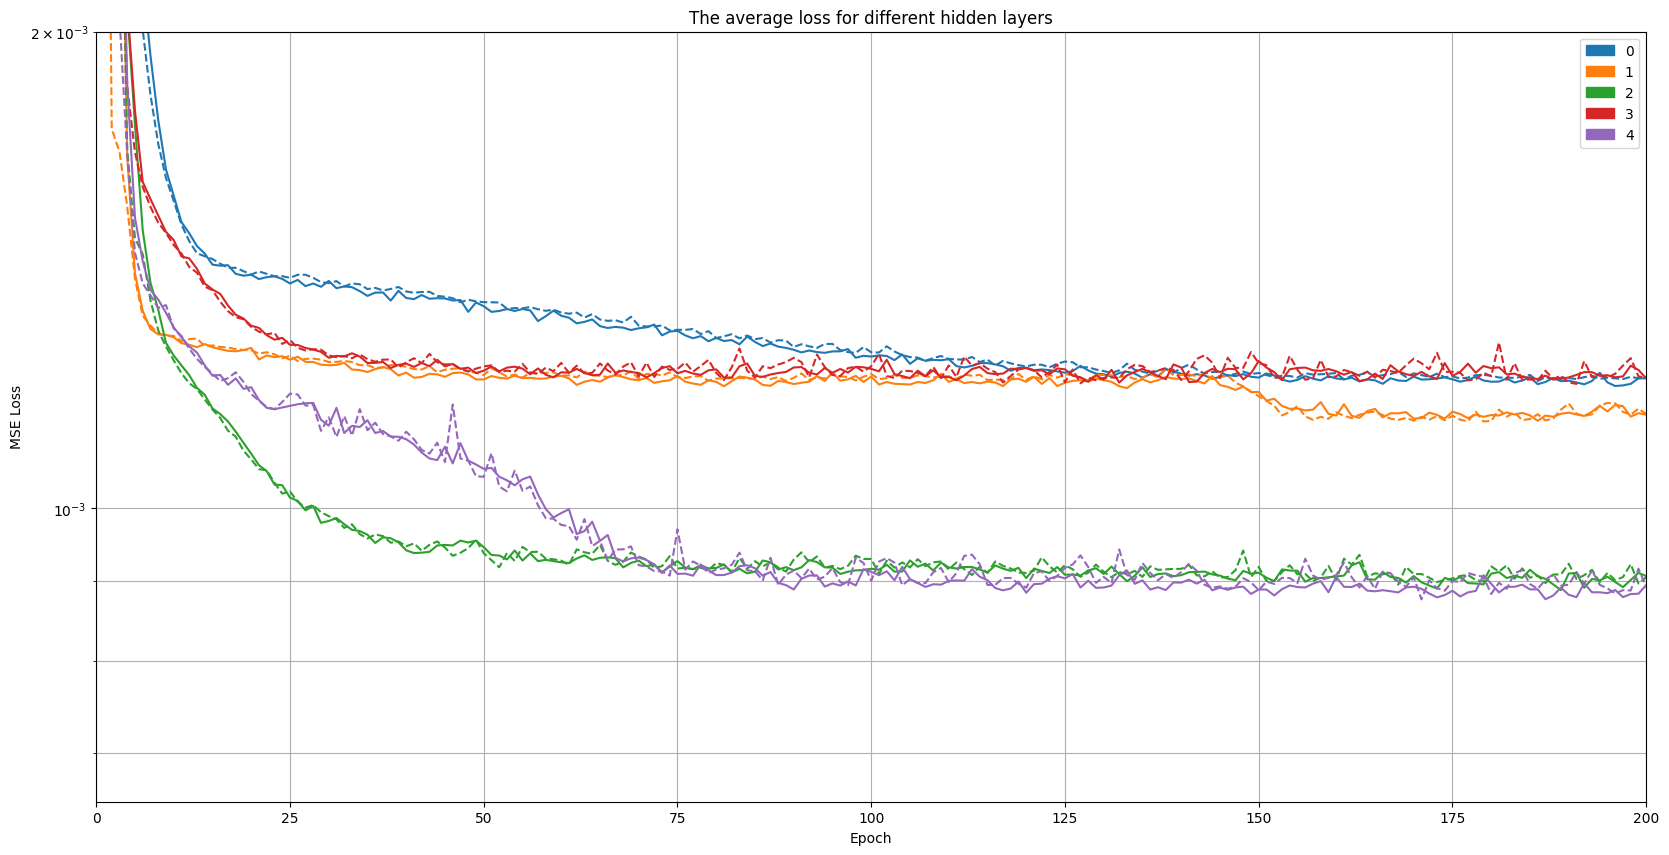

In [11]:
fig = plt.figure(figsize=(20, 10))
plot_multiple_experiments_averaged(different_model_layouts, df, [0, 1, 2, 3, 4])
plt.grid(which="both")
plt.yscale("log")
plt.ylim(top=0.002)
plt.xlim(0, 200)
plt.title("The average loss for different hidden layers")


# Different initialization functions (TODO)

In [15]:
different_model_layouts = experimenten.iloc[25:33] 
different_model_layouts.weights_init_function.to_list()

['<function xavier_uniform_ at 0x00000298CA365C60>',
 '<function xavier_normal_ at 0x00000298CA365D00>',
 '<function kaiming_uniform_ at 0x00000298CA365E40>',
 '<function kaiming_normal_ at 0x00000298CA365EE0>',
 '<function normal_ at 0x00000298CA3656C0>',
 '<function ones_ at 0x00000298CA365940>',
 '<function zeros_ at 0x00000298CA3659E0>',
 '<function orthogonal_ at 0x00000298CA365F80>']

(0.001, 0.002)

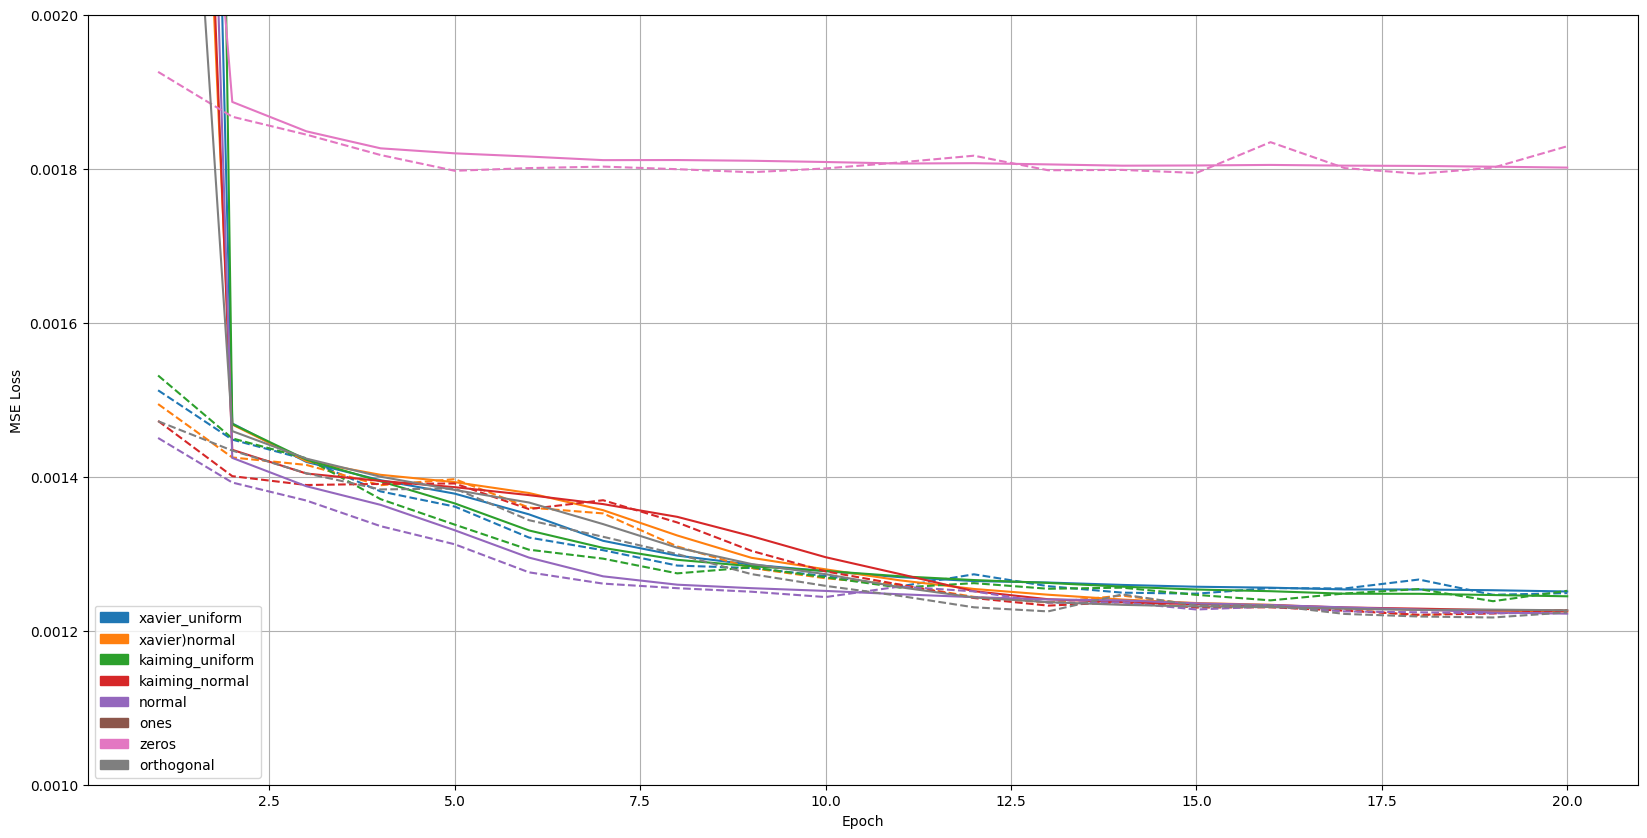

In [23]:
fig = plt.figure(figsize=(20, 10))
function_descriptions = [
    "xavier_uniform",
    "xavier)normal",
    "kaiming_uniform",
    "kaiming_normal",
    "normal",
    "ones",
    "zeros",
    "orthogonal",
]
plot_multiple_experiments_averaged(different_model_layouts, df, function_descriptions)
plt.grid(which="both")
# plt.yscale("log")
plt.ylim(top=0.002, bottom=0.001)
# plt.xlim(0, 200)
# plt.title("The average loss for different hidden layers")
